In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from dataclasses import dataclass
from tqdm import tqdm

In [2]:
battery_data = pd.read_csv('../data/battery_train.csv')

### Preprocess data

In [3]:
POLYNOMIAL_DEGREE = 5

capacity_points = np.array([])
RUL_points = np.array([])

# Extract (capacity, RUL) points (over all cycles) for every battery into (capacity_points, RUL_points)
for column in battery_data:
    if column == 'Cycle':
        continue

    capacities = battery_data[column].dropna()
    total_useful_life = len(capacities)
    RULs = np.arange(total_useful_life - 1, -1, -1) # The first measured capacity corresponds to an RUL of total_useful_life - 1 as the battery has already consumed a cycle of its life
    capacity_points = np.concatenate((capacity_points, capacities))
    RUL_points = np.concatenate((RUL_points, RULs))

capacity_points = capacity_points.reshape((-1, 1))
transformer = PolynomialFeatures(degree=POLYNOMIAL_DEGREE, include_bias=True) # Set include_bias=True to add a column of 1s to the array, such that the polynomial model becomes: Y = β_0 * 1 + β_1 * x^1 + ... + β_p * x^p + e. This column of 1s represents the intercept term β_0
x = transformer.fit_transform(capacity_points)
y = RUL_points

### Scikit-learn

model.intercept_=0.0
model.coef_=array([ 1.74617850e+07, -9.13951926e+07,  1.91029471e+08, -1.99299036e+08,
        1.03778237e+08, -2.15750760e+07])
[[1.         1.07858811 1.16335232 1.25477798 1.35338861 1.45974887]
 [1.         1.0785975  1.16337256 1.25481073 1.35343571 1.45981237]
 [1.         1.07860664 1.16339228 1.25484264 1.3534816  1.45987423]
 ...
 [1.         0.88072768 0.77568124 0.68316394 0.60168139 0.52991745]
 [1.         0.88020331 0.77475787 0.68194444 0.60024975 0.52834182]
 [1.         0.87967757 0.77383263 0.6807232  0.59881693 0.52676582]]


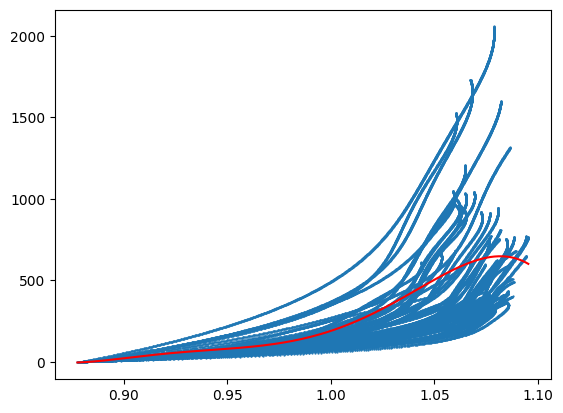

In [4]:
# Since the column of 1s has already been added to the input data x, the intercept term β_0 is already included in the model coefficients, and its value can be found at the zeroth index of model.coef_. Therefore, there is no need to separately fit the intercept term in the model and we can set fit_intercept=False
model = LinearRegression(fit_intercept=False).fit(x, y)
print(f'{model.intercept_=}')
print(f'{model.coef_=}')
coefs = model.coef_

N = 200
x_linspace = np.linspace(np.min(capacity_points), np.max(capacity_points), N).reshape((-1, 1))
x_axis = transformer.fit_transform(x_linspace)
y_pred = model.predict(x_axis)
plt.scatter(capacity_points, RUL_points, s=0.4)
plt.plot(x_linspace, y_pred, c='red')

X = np.linspace(0, 1.10, N)
# Y = model.intercept_ + coefs[0] * X + coefs[1] * X**2
# Y = model.intercept_ + coefs[1] * X + coefs[2] * X**2
# Y = coefs[0] + coefs[1] * X + coefs[2] * X**2
# plt.plot(X, Y)
print(x)

### Statsmodels
Has more advanced summary

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     5230.
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:22:06   Log-Likelihood:            -3.5006e+05
No. Observations:               49433   AIC:                         7.001e+05
Df Residuals:                   49427   BIC:                         7.002e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.746e+07   2.88e+06      6.054      0.0

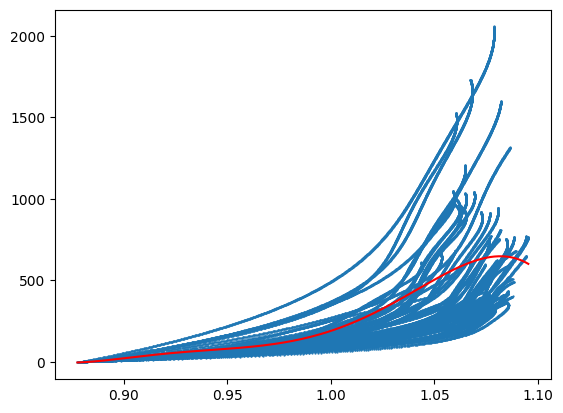

In [5]:
model = sm.OLS(y, x).fit()
print(model.summary())

N = 200
x_linspace = np.linspace(np.min(capacity_points), np.max(capacity_points), N).reshape((-1, 1))
x_axis = transformer.fit_transform(x_linspace)
y_pred = model.predict(x_axis)
plt.scatter(capacity_points, RUL_points, s=0.4)
plt.plot(x_linspace, y_pred, c='red')

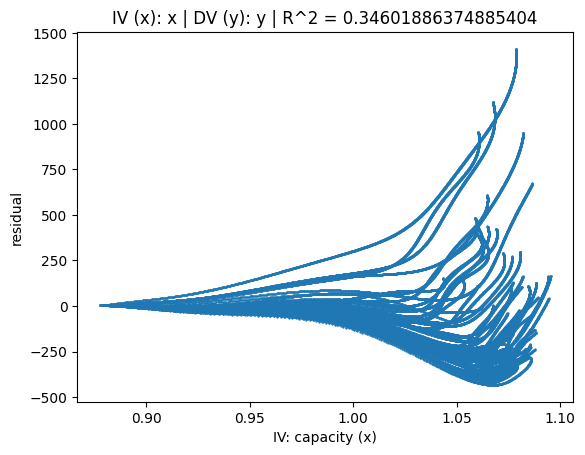

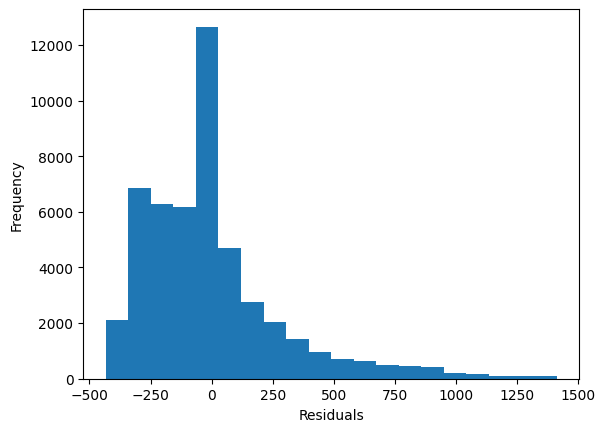

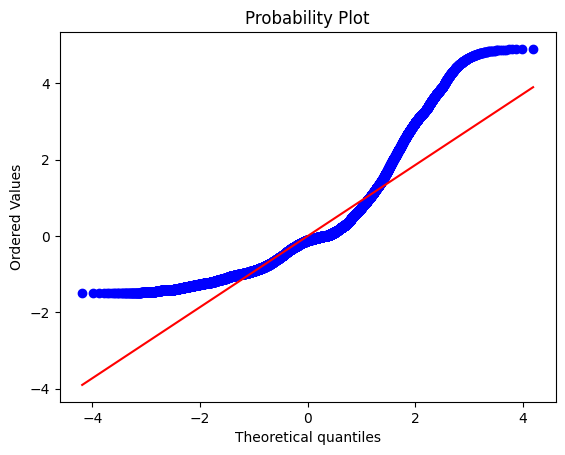

C:\Users\Thom van den Hil\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test statistic: 0.868, p-value: 0.000


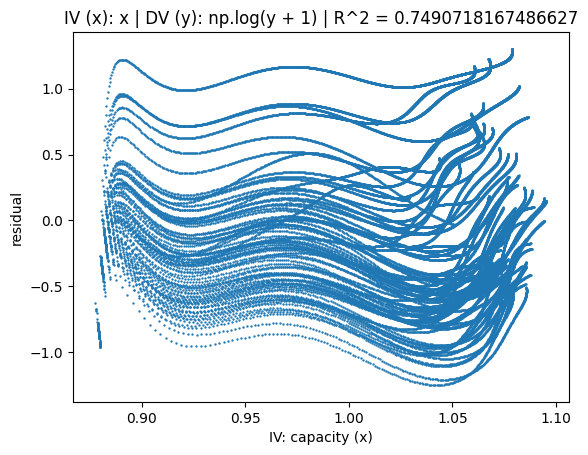

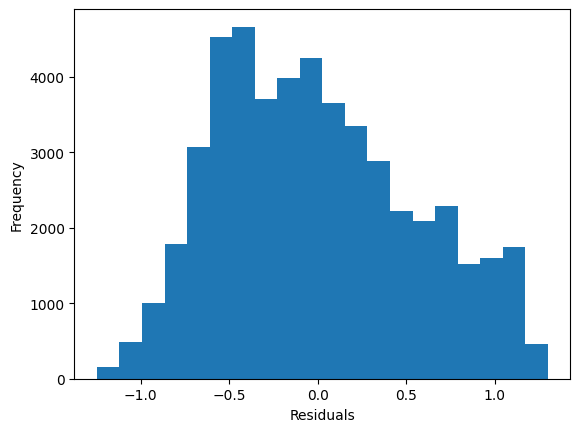

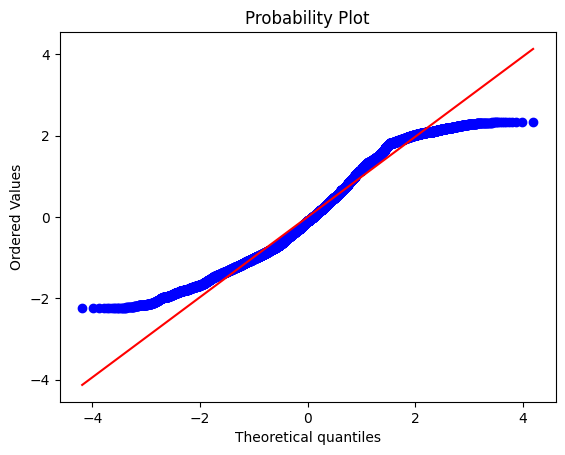

C:\Users\Thom van den Hil\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test statistic: 0.973, p-value: 0.000


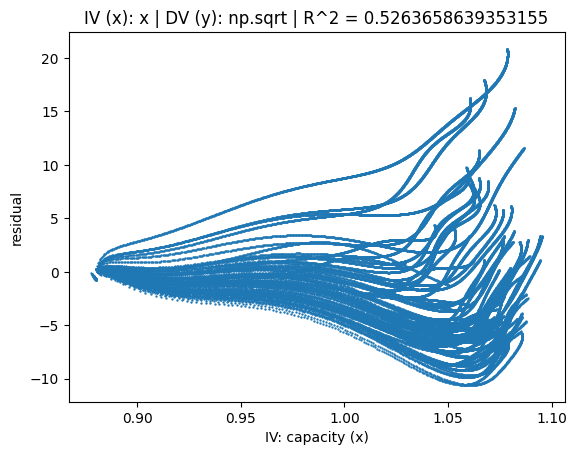

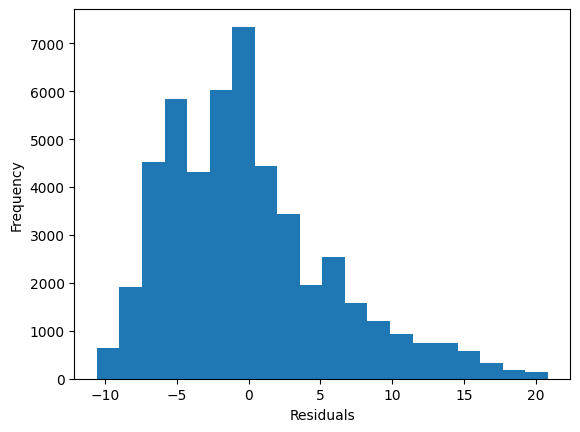

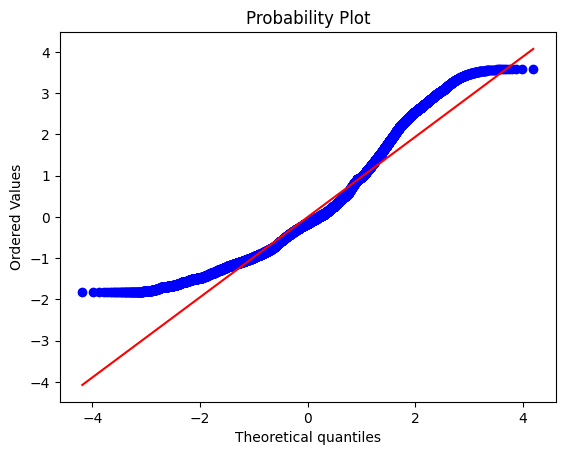

C:\Users\Thom van den Hil\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test statistic: 0.944, p-value: 0.000


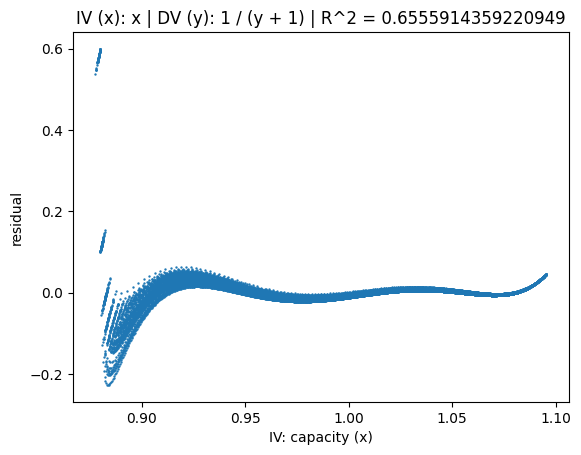

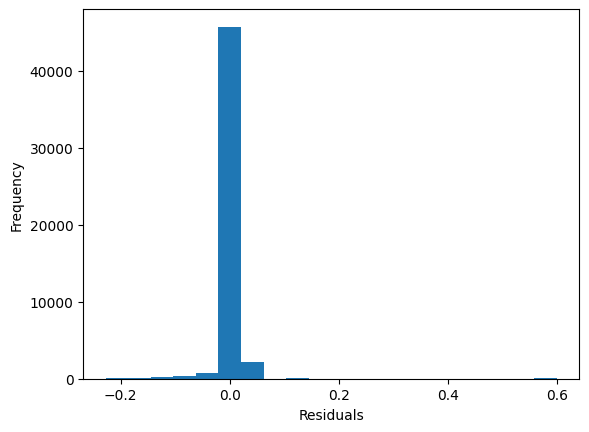

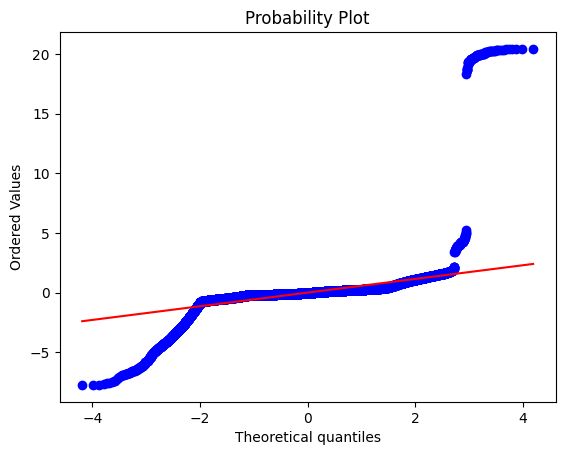

C:\Users\Thom van den Hil\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test statistic: 0.328, p-value: 0.000


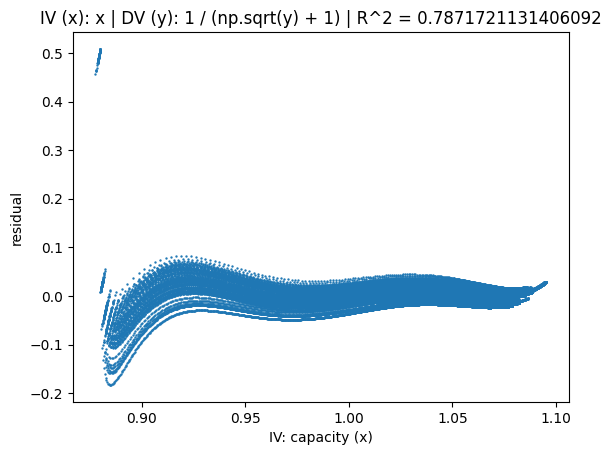

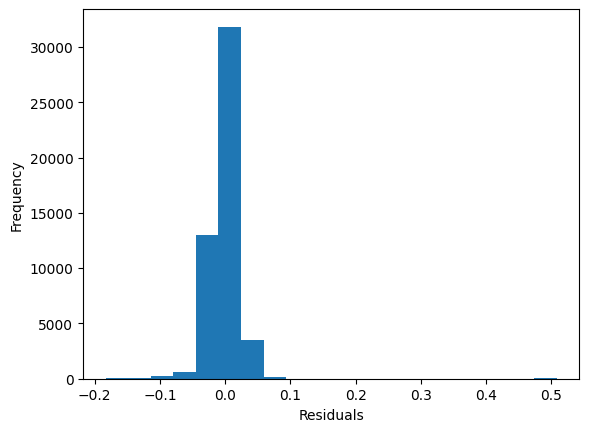

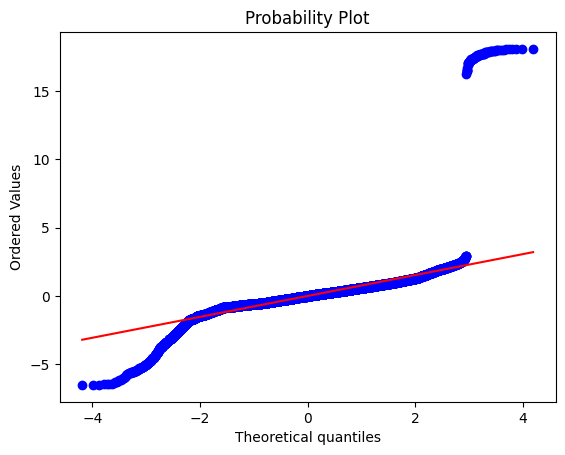

C:\Users\Thom van den Hil\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test statistic: 0.586, p-value: 0.000


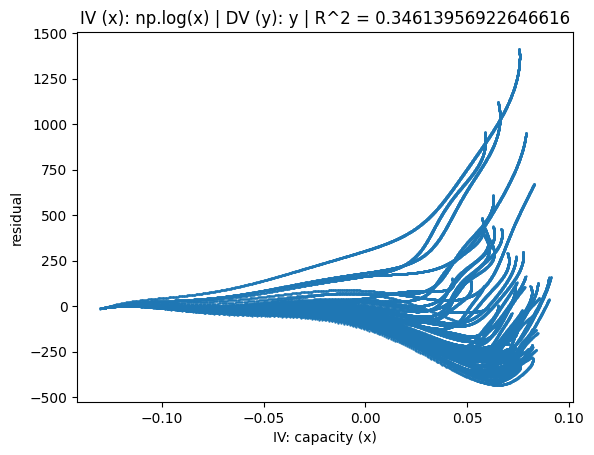

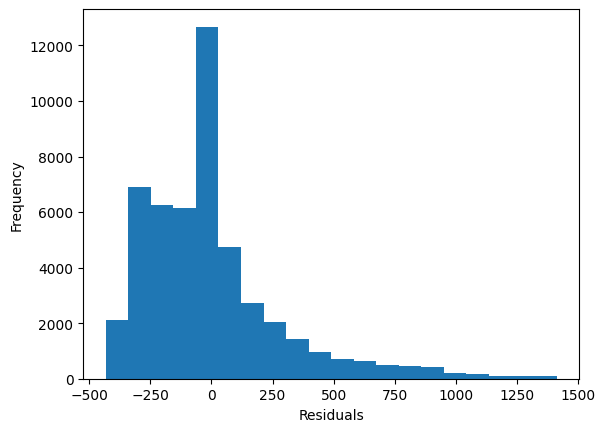

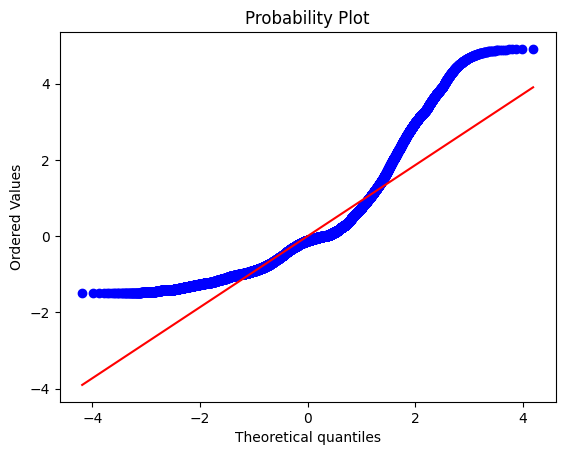

C:\Users\Thom van den Hil\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test statistic: 0.867, p-value: 0.000


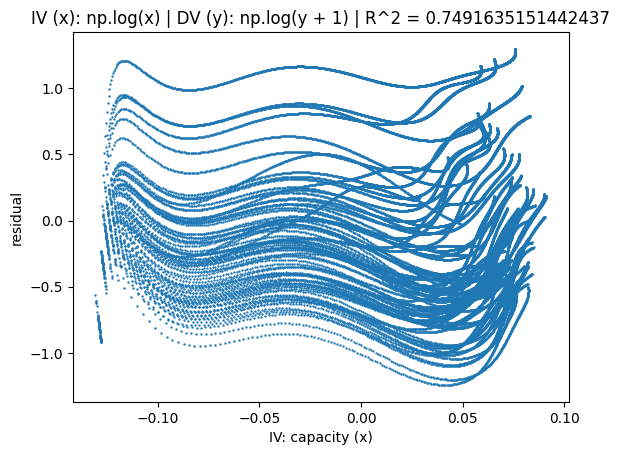

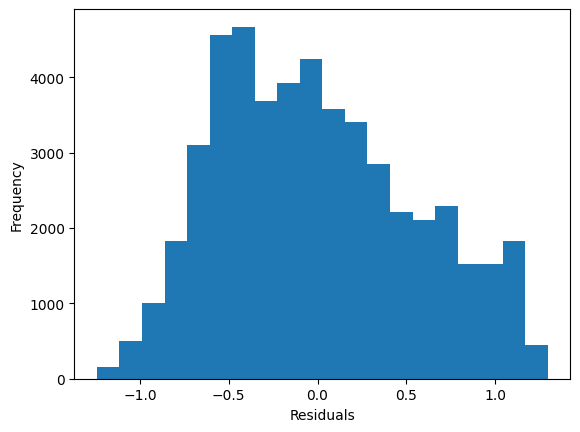

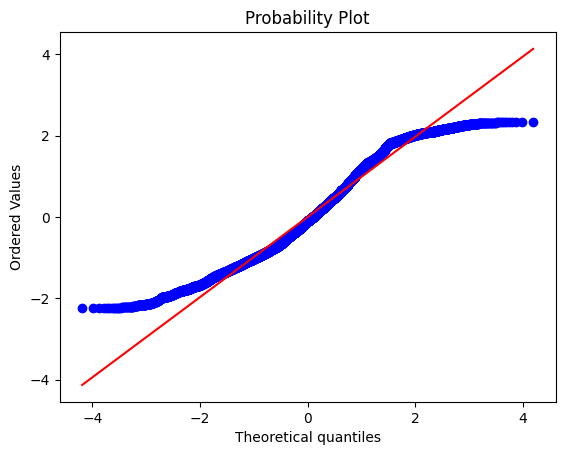

C:\Users\Thom van den Hil\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test statistic: 0.973, p-value: 0.000


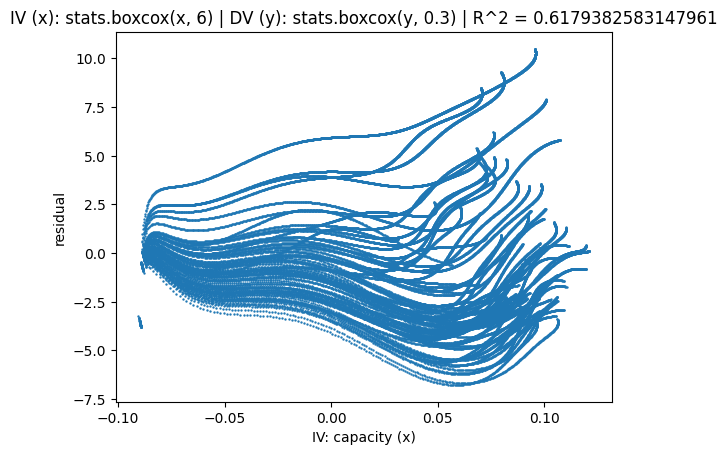

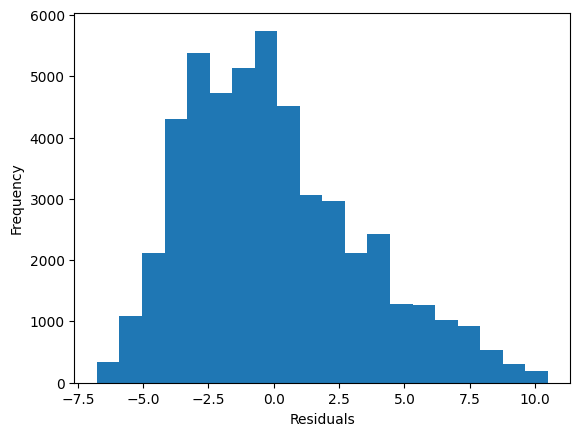

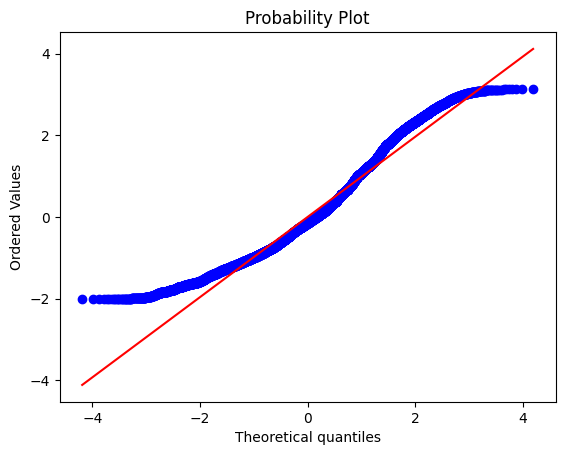

Shapiro-Wilk test statistic: 0.964, p-value: 0.000


C:\Users\Thom van den Hil\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [9]:
%matplotlib inline
# plt.rcParams['figure.figsize'] = [30, 10]

transformation_funcs = [
    (
        'lambda x: x',
        'lambda y: y',
    ),
    (
        'lambda x: x',
        'lambda y: np.log(y + 1)',
    ),
    (
        'lambda x: x',
        'np.sqrt',
    ),
    (
        'lambda x: x',
        'lambda y: 1 / (y + 1)',
    ),
    (
        'lambda x: x',
        'lambda y: 1 / (np.sqrt(y) + 1)',
    ),
    (
        'lambda x: np.log(x)',
        'lambda y: y',
    ),
    (
        'lambda x: np.log(x)',
        'lambda y: np.log(y + 1)',
    ),
    (
        'lambda x: stats.boxcox(x, 6)',
        'lambda y: stats.boxcox(y, 0.3)',
    )
]

for i, (transformation_func_x, transformation_func_y) in enumerate(transformation_funcs):
    plot_name = f'IV (x): {transformation_func_x.replace("lambda x: ", "")} | DV (y): {transformation_func_y.replace("lambda y: ", "")}'
    transformation_func_x = eval(transformation_func_x)
    transformation_func_y = eval(transformation_func_y)
    x = transformer.fit_transform(transformation_func_x(capacity_points))
    y = transformation_func_y(RUL_points)

    model = sm.OLS(y, x).fit()
    # print(model.summary())
    plot_name += f' | R^2 = {model.rsquared}'

    y_pred = model.predict(x)
    iv_x = x[:, 1].reshape((-1))
    residuals = y - y_pred # alternative: model.resid
    plt.scatter(iv_x, residuals, s=0.5)
    plt.xlabel('IV: capacity (x)')
    plt.ylabel('residual')
    plt.title(plot_name)
    plt.savefig(f'out/residuals-transformation-images/{i}.png', bbox_inches='tight')
    plt.show()
    

    # Plot a histogram of the residuals
    plt.hist(residuals, bins=20)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    # Standardize residuals
    mean = np.mean(residuals)
    std = np.std(residuals)
    z = (residuals - mean) / std
    
    # Generate a normal probability plot of the residuals
    stats.probplot(z, dist='norm', plot=plt)
    plt.show()

    # Test for normality using the Shapiro-Wilk test
    stat, p = stats.shapiro(residuals)
    print(f'Shapiro-Wilk test statistic: {stat:.3f}, p-value: {p:.3f}')


    # fig = plt.figure(figsize=(14, 8))
    # sm.graphics.plot_regress_exog(model, 'x1', fig=fig)
    # plt.savefig('out/test.png', bbox_inches='tight')
    # plt.show()

    # plt.scatter(x, transformation_func(RUL_points), s=0.7)
    # plt.title(plot_title)
    # plt.savefig(f'out/transformation-images/{plot_title}.png', bbox_inches='tight')
    # plt.show()
    
# RUL_points_pred = model.predict(transformer.fit_transform(capacity_points.reshape((-1, 1))))
# plt.scatter(capacity_points, RUL_points - RUL_points_pred, s=0.5)

# fig = plt.figure(figsize=(14, 8))
# sm.graphics.plot_regress_exog(model, 'x1', fig=fig)

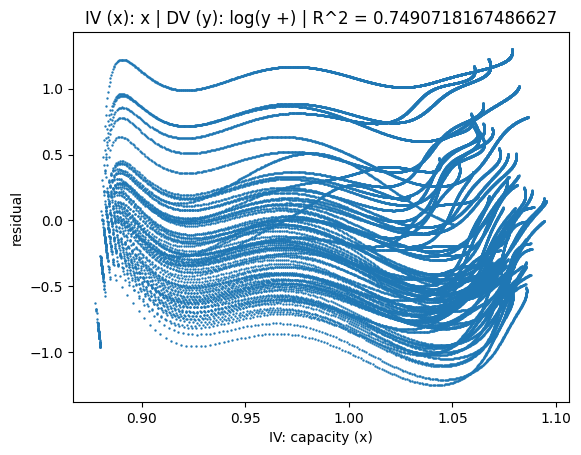

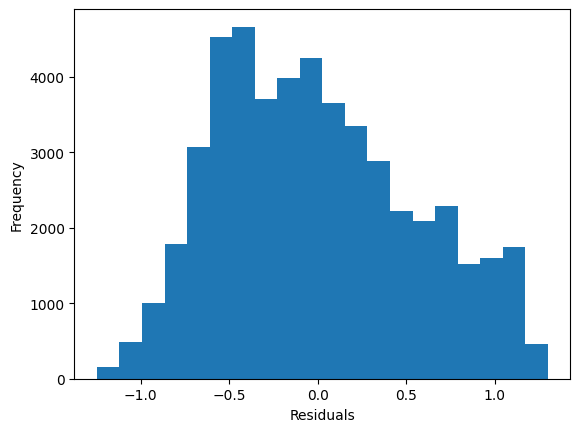

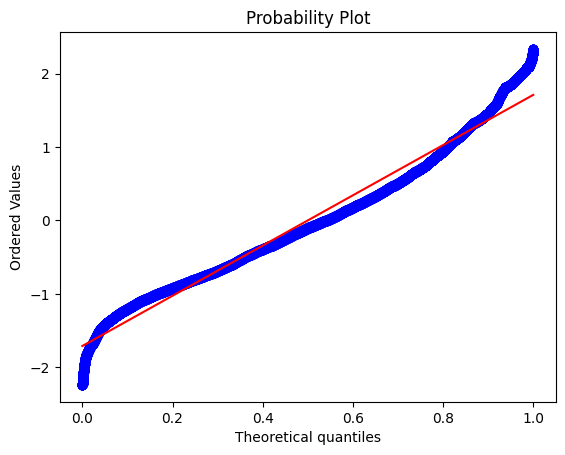

In [7]:
plot_name = f'IV (x): x | DV (y): log(y + 1)'
transformation_func_x = lambda x: x
transformation_func_y = lambda y: np.log(y + 1)
x = transformer.fit_transform(transformation_func_x(capacity_points))
y = transformation_func_y(RUL_points)

model = sm.OLS(y, x).fit()
# print(model.summary())
plot_name += f' | R^2 = {model.rsquared}'

y_pred = model.predict(x)
iv_x = x[:, 1].reshape((-1))
residuals = y - y_pred # alternative: model.resid
plt.scatter(iv_x, residuals, s=0.5)
plt.xlabel('IV: capacity (x)')
plt.ylabel('residual')
plt.title(plot_name)
# plt.savefig(f'out/residuals-transformation-images/{i}.png', bbox_inches='tight')
plt.show()


# Plot a histogram of the residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Standardize residuals
mean = np.mean(residuals)
std = np.std(residuals)
z = (residuals - mean) / std

# Generate a uniform probability plot of the residuals
stats.probplot(z, dist='uniform', plot=plt)
plt.show()

### Forward regression to find the statistically significant polynomial degree

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                 6.798e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:53   Log-Likelihood:                -42679.
No. Observations:               49433   AIC:                         8.536e+04
Df Residuals:                   49430   BIC:                         8.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -74.2394      0.964    -76.988      0.0

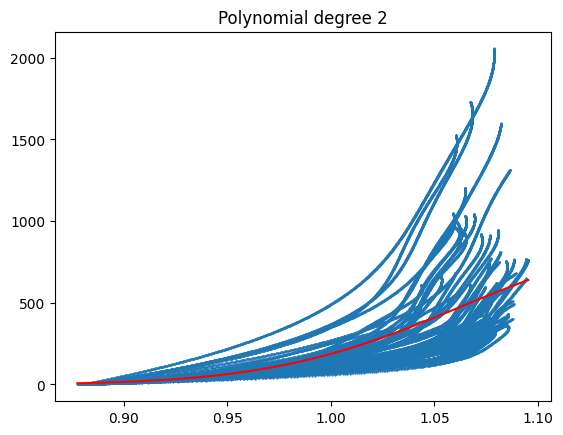

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                 4.620e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:53   Log-Likelihood:                -42328.
No. Observations:               49433   AIC:                         8.466e+04
Df Residuals:                   49429   BIC:                         8.470e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -535.2297     17.376    -30.803      0.0

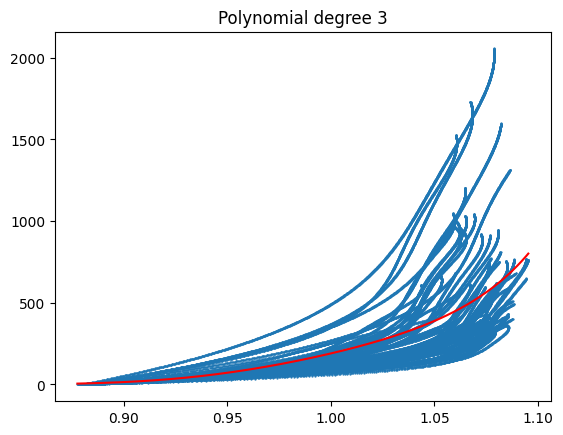

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 3.646e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:54   Log-Likelihood:                -41394.
No. Observations:               49433   AIC:                         8.280e+04
Df Residuals:                   49428   BIC:                         8.284e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.414e+04    312.279    -45.277      0.0

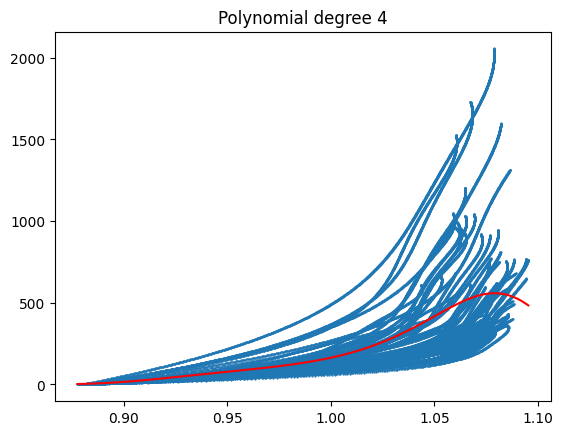

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                 2.951e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:54   Log-Likelihood:                -41179.
No. Observations:               49433   AIC:                         8.237e+04
Df Residuals:                   49427   BIC:                         8.242e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.299e+05   5577.149    -23.294      0.0

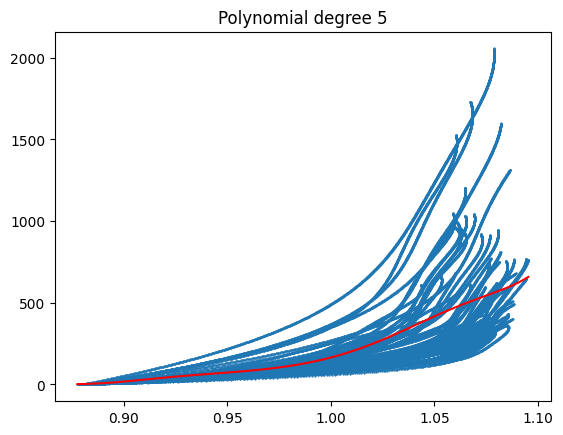

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                 2.460e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:55   Log-Likelihood:                -41174.
No. Observations:               49433   AIC:                         8.236e+04
Df Residuals:                   49426   BIC:                         8.242e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.291e+05   9.99e+04     -4.297      0.0

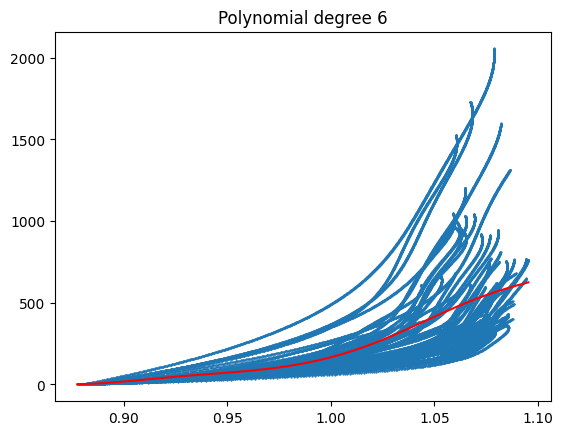

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 2.129e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:55   Log-Likelihood:                -40991.
No. Observations:               49433   AIC:                         8.200e+04
Df Residuals:                   49425   BIC:                         8.207e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.476e+07   1.79e+06    -19.405      0.0

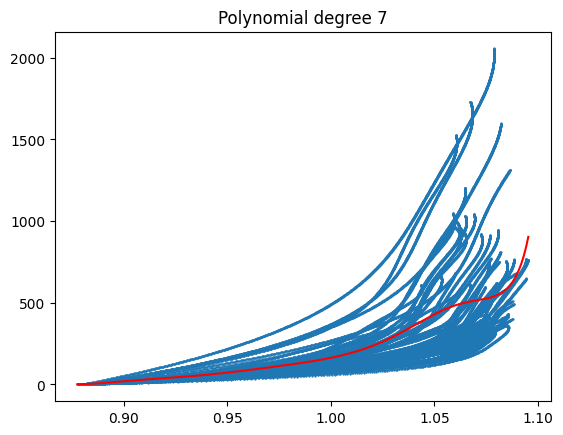

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.866e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:56   Log-Likelihood:                -40962.
No. Observations:               49433   AIC:                         8.194e+04
Df Residuals:                   49424   BIC:                         8.202e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.776e+08   3.21e+07     -8.636      0.0

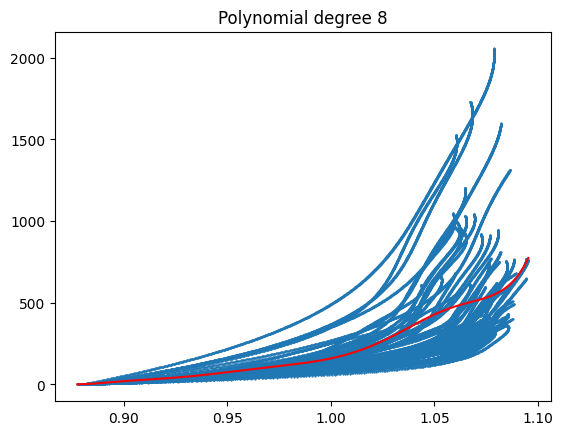

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.656e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:56   Log-Likelihood:                -40990.
No. Observations:               49433   AIC:                         8.200e+04
Df Residuals:                   49423   BIC:                         8.209e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.756e+08   5.81e+08     -1.334      0.1

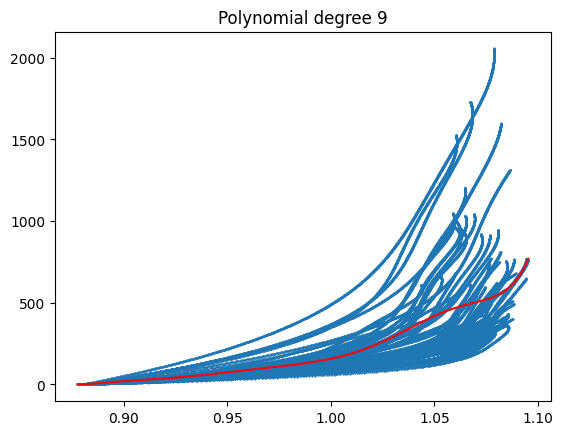

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.659e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:56   Log-Likelihood:                -40963.
No. Observations:               49433   AIC:                         8.195e+04
Df Residuals:                   49423   BIC:                         8.203e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.088e+08   2.94e+08     -1.049      0.2

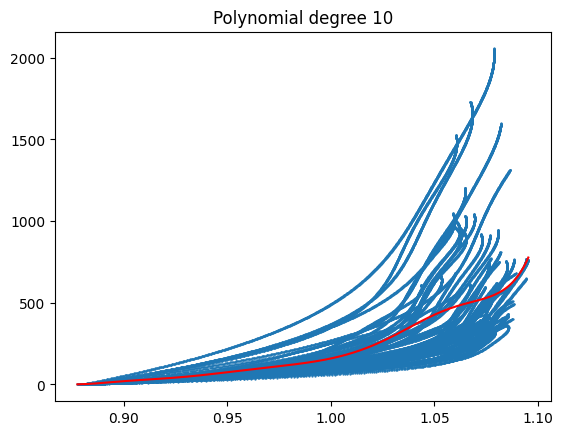

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.659e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:57   Log-Likelihood:                -40962.
No. Observations:               49433   AIC:                         8.194e+04
Df Residuals:                   49423   BIC:                         8.203e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.877e+08   1.56e+08     -1.203      0.2

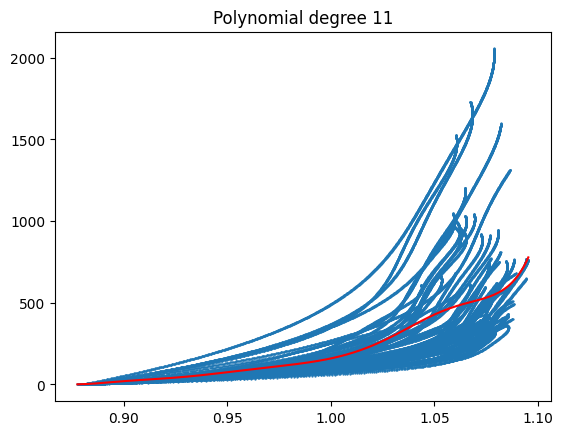

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                 1.661e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:57   Log-Likelihood:                -40931.
No. Observations:               49433   AIC:                         8.188e+04
Df Residuals:                   49423   BIC:                         8.197e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.466e+10   2.52e+09     -9.780      0.0

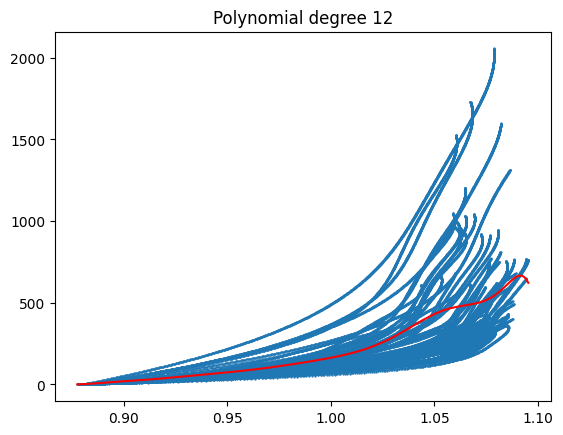

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                 1.496e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:58   Log-Likelihood:                -40920.
No. Observations:               49433   AIC:                         8.186e+04
Df Residuals:                   49422   BIC:                         8.196e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.425e+10   1.47e+09     -9.680      0.0

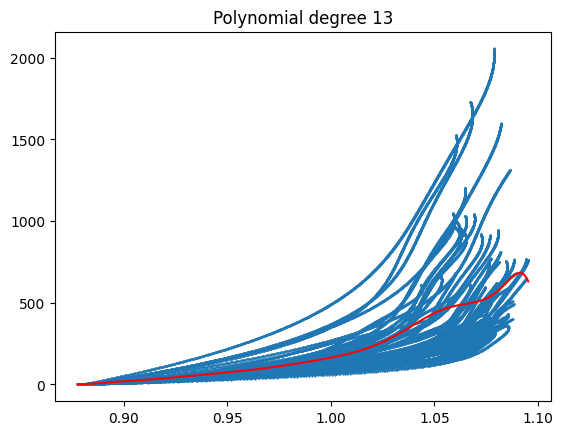

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                 1.496e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:58   Log-Likelihood:                -40921.
No. Observations:               49433   AIC:                         8.186e+04
Df Residuals:                   49422   BIC:                         8.196e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.13e+10   1.49e+09     -7.590      0.0

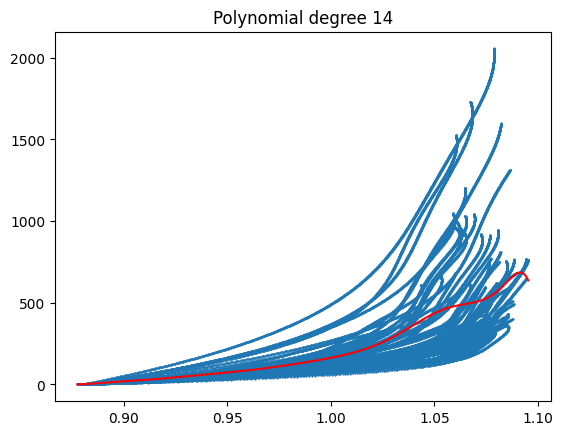

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.495e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:59   Log-Likelihood:                -40936.
No. Observations:               49433   AIC:                         8.189e+04
Df Residuals:                   49422   BIC:                         8.199e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.083e+10   2.26e+09     -4.802      0.0

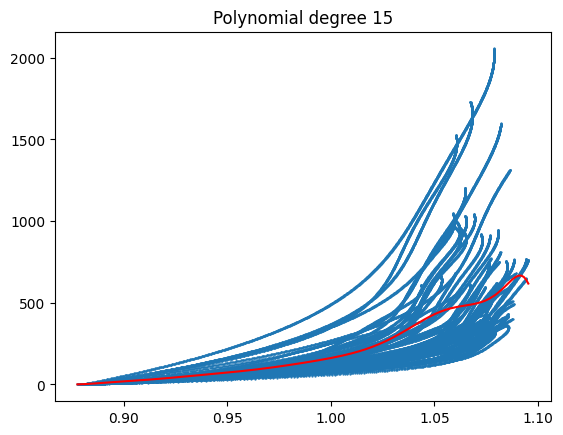

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.495e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:23:59   Log-Likelihood:                -40939.
No. Observations:               49433   AIC:                         8.190e+04
Df Residuals:                   49422   BIC:                         8.200e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.378e+09   7.31e+08     -5.987      0.0

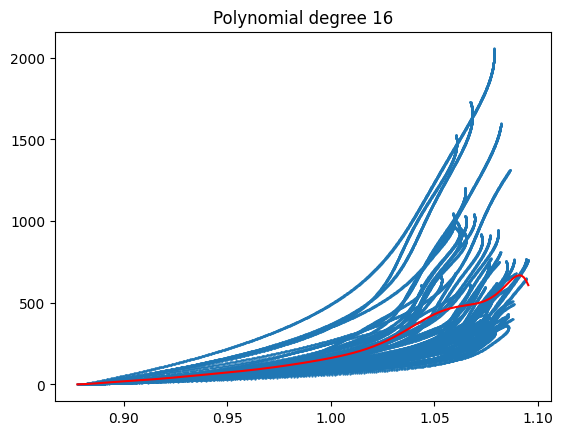

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                 1.496e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:24:00   Log-Likelihood:                -40919.
No. Observations:               49433   AIC:                         8.186e+04
Df Residuals:                   49422   BIC:                         8.196e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.84e+10   4.82e+09     -3.822      0.0

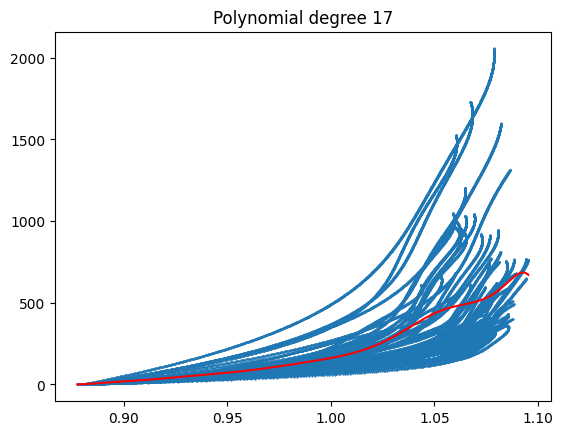

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.487e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:24:00   Log-Likelihood:                -41037.
No. Observations:               49433   AIC:                         8.210e+04
Df Residuals:                   49422   BIC:                         8.219e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.538e+10   3.19e+09     -4.818      0.0

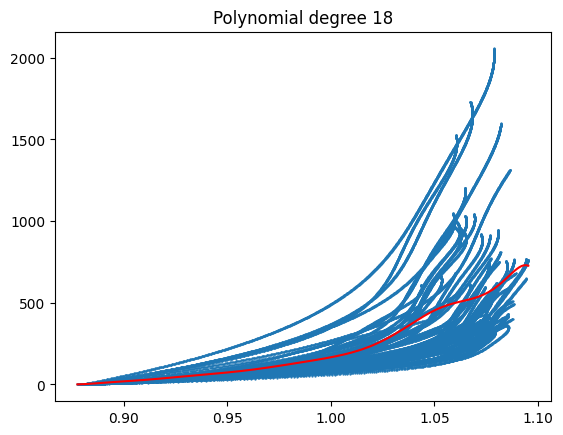

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                 1.360e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:24:01   Log-Likelihood:                -40916.
No. Observations:               49433   AIC:                         8.186e+04
Df Residuals:                   49421   BIC:                         8.196e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.276e+10   2.42e+09     -5.281      0.0

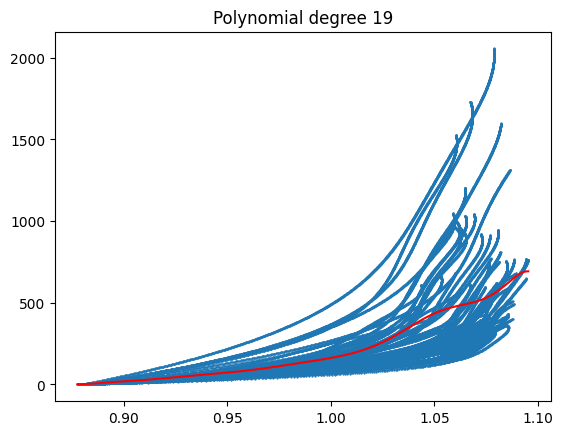

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.351e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:24:01   Log-Likelihood:                -41047.
No. Observations:               49433   AIC:                         8.212e+04
Df Residuals:                   49421   BIC:                         8.222e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.117e+09   1.84e+09     -4.963      0.0

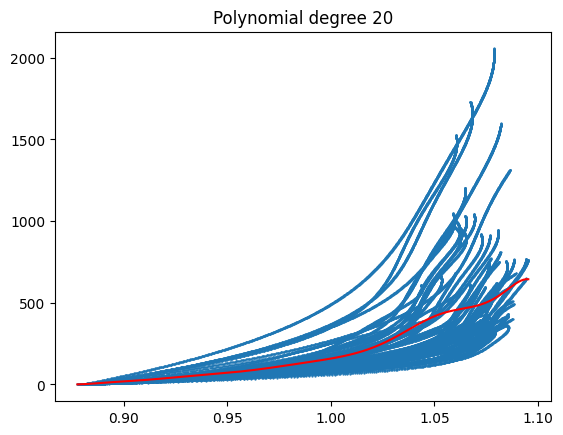

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                 1.359e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:24:02   Log-Likelihood:                -40933.
No. Observations:               49433   AIC:                         8.189e+04
Df Residuals:                   49421   BIC:                         8.200e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.18e+09    9.4e+08     -5.511      0.0

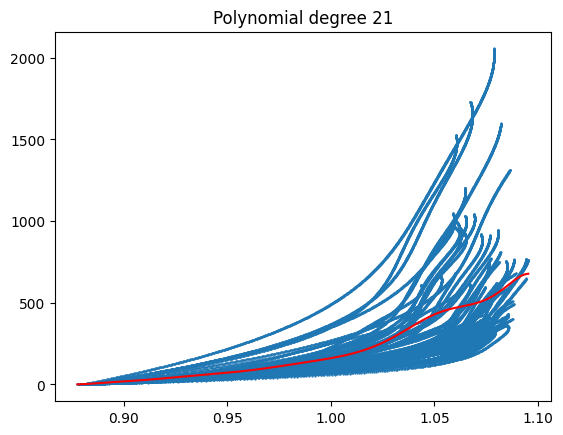

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.350e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:24:02   Log-Likelihood:                -41060.
No. Observations:               49433   AIC:                         8.214e+04
Df Residuals:                   49421   BIC:                         8.225e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.356e+09   5.79e+08     -5.791      0.0

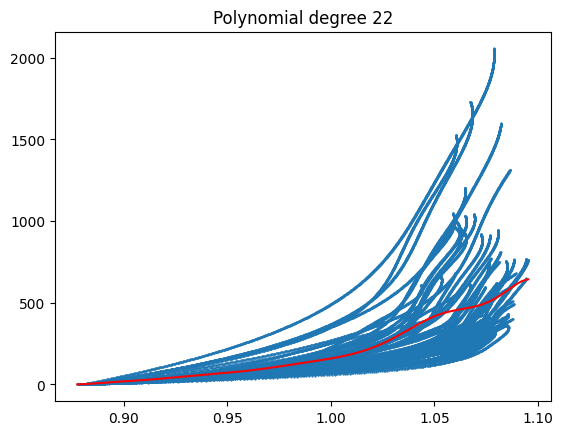

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                 1.359e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:24:03   Log-Likelihood:                -40931.
No. Observations:               49433   AIC:                         8.189e+04
Df Residuals:                   49421   BIC:                         8.199e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.916e+09   3.66e+08     -5.239      0.0

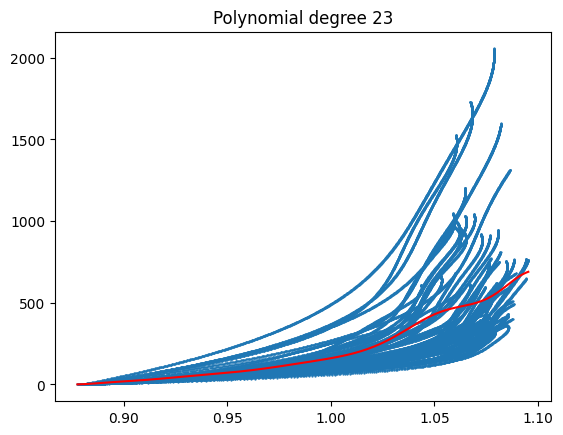

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.358e+04
Date:                Fri, 17 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:24:04   Log-Likelihood:                -40945.
No. Observations:               49433   AIC:                         8.191e+04
Df Residuals:                   49421   BIC:                         8.202e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.934e+09    5.7e+09     -0.691      0.4

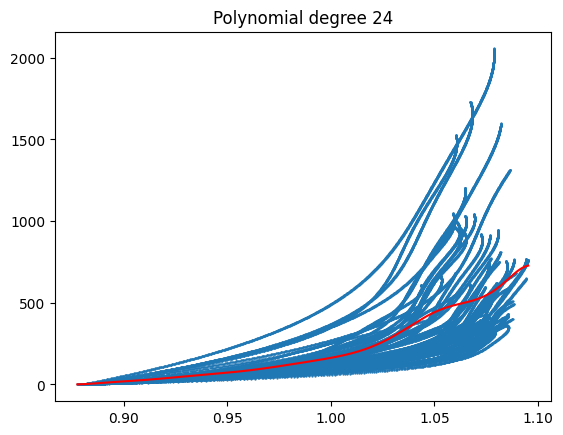

In [12]:
for polynomial_degree in range(2, 25):
    transformer = PolynomialFeatures(degree=polynomial_degree, include_bias=True)
    x = transformer.fit_transform(capacity_points)
    y = np.log(RUL_points + 1)

    model = sm.OLS(y, x).fit()
    print(model.summary())

    N = 200
    x_linspace = np.linspace(np.min(capacity_points), np.max(capacity_points), N).reshape((-1, 1))
    x_axis = transformer.fit_transform(x_linspace)
    y_pred = np.exp(model.predict(x_axis))
    plt.scatter(capacity_points, RUL_points, s=0.4)
    plt.plot(x_linspace, y_pred, c='red')
    plt.title(f'Polynomial degree {polynomial_degree}')
    plt.show()